<a href="https://colab.research.google.com/github/shahpranshu27/Rain-Prediction-Australia/blob/main/Rain_Prediction_Aussie_Decision_Tree_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
raw_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv')

## **Pre-Processing**

In [3]:
raw_df.sample(10)

Date          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
66331   2015-02-08  MelbourneAirport     18.8     23.5       0.0         12.8   
101289  2014-01-09      MountGambier     10.6     30.9       0.0          7.6   
50485   2013-03-02       Tuggeranong     11.7     17.1       0.0          NaN   
71650   2012-07-11           Mildura      4.4     14.6       5.8          0.8   
2952    2017-03-30            Albury     11.7     21.3       0.0          NaN   
15643   2010-06-21         Newcastle      NaN     16.8       0.0          NaN   
4215    2012-04-20     BadgerysCreek     14.1     26.6       0.6          NaN   
68995   2013-08-28         Melbourne     11.3     22.5       0.0          3.8   
127865  2011-12-03           Walpole     13.6     29.9       0.0          NaN   
30498   2008-12-19            Sydney     17.3     26.4       0.6         10.2   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
66331        5.8           S           39.0        SSW        SSE   
101289      13.3           S           37.0          E          S   
50485        NaN           S           50.0          S        ESE   
71650        2.9           N           24.0          N          N   
2952         NaN           W           39.0          W          S   
15643        NaN         NaN            NaN        NaN         SE   
4215         NaN         ENE           13.0         NW        NNE   
68995        7.4           N           44.0        ENE        NNE   
127865       NaN          NE           48.0        ENE        ENE   
30498       12.2         NaN            NaN        WNW         SE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
66331           22.0          22.0         77.0         55.0       1020.2   
101289          13.0          26.0         61.0         34.0       1018.0   
50485           22.0          22.0         61.0         60.0       1022.9   
71650           11.0          15.0         83.0         56.0       1017.7   
2952            15.0          19.0         68.0         49.0       1011.8   
15643            0.0           4.0         87.0         96.0          NaN   
4215             2.0           9.0        100.0         54.0       1016.5   
68995           11.0          28.0         73.0         39.0       1019.4   
127865          22.0          15.0         50.0         32.0       1016.8   
30498            7.0          30.0         67.0         58.0       1005.9   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
66331        1021.9       7.0       7.0     19.3     21.3        No   
101289       1014.8       1.0       1.0     19.1     30.0        No   
50485        1022.2       NaN       NaN     13.0     16.7        No   
71650        1014.7       4.0       7.0      8.1     14.3       Yes   
2952         1011.8       NaN       7.0     13.7     19.1        No   
15643           NaN       3.0       8.0     10.8     14.6        No   
4215         1014.0       NaN       NaN     17.6     26.3        No   
68995        1015.5       7.0       NaN     13.9     21.4        No   
127865       1013.1       NaN       NaN     21.5     29.2        No   
30498        1007.8       2.0       6.0     21.6     21.2        No   

       RainTomorrow  
66331            No  
101289           No  
50485            No  
71650           Yes  
2952             No  
15643           Yes  
4215             No  
68995            No  
127865           No  
30498            No

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
raw_df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
raw_df.dropna(subset=["RainTomorrow"], inplace=True)

## **EDA (Visualization)**

In [7]:
px.histogram(raw_df, x="RainTomorrow", color=raw_df['RainToday'], title="RainToday vs RainTomorrow")

In [8]:
px.histogram(raw_df, x="Location", color="RainToday", title="Location vs Rain Today")

In [9]:
px.scatter(raw_df.sample(2000), x="MinTemp", y="MaxTemp", color="RainToday", title="MinTemp vs MaxTemp")

In most of the cases, when it rain today, the temp difference between MinTemp and MaxTemp is not much.

In [10]:
raw_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
px.scatter(raw_df.sample(2000), x="Temp3pm", y="Humidity3pm", title="Temp3pm vs Humidity3pm")

In most of the cases, when the temp3pm increases, humidity3pm decreases.

## **Preparing data for training**

## Train, Valid, Test

In [12]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year<2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year>2015]

In [13]:
print("train_df shape: ", train_df.shape)
print("val_df shape: ", val_df.shape)
print("test_df shape: ", test_df.shape)

train_df shape:  (98988, 23)
val_df shape:  (17231, 23)
test_df shape:  (25974, 23)


In [14]:
train_df.sample()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
75326  2009-12-13  Portland     13.0     17.7       0.8          4.0   

       Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
75326       0.7           W           37.0        WSW        SSW   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
75326          19.0          17.0        100.0         83.0       1021.6   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
75326       1022.1       8.0       7.0     13.9     15.9        No   

      RainTomorrow  
75326           No

In [15]:
input_cols = list(train_df.columns)[1:-1]
target_col = "RainTomorrow"

In [16]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Let's identify numerical and categorical columns

In [17]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [18]:
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [19]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

## **Imputing missing numerical cols**

In [20]:
train_inputs[numerical_cols].isna().sum().sort_values(ascending=False)

Sunshine         40696
Evaporation      37110
Cloud3pm         36766
Cloud9am         35764
Pressure9am       9345
Pressure3pm       9309
WindGustSpeed     6902
Humidity9am       1265
Humidity3pm       1186
WindSpeed3pm      1140
WindSpeed9am      1133
Rainfall          1000
Temp9am            783
Temp3pm            663
MinTemp            434
MaxTemp            198
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
imputer = SimpleImputer(strategy='mean').fit(raw_df[numerical_cols])

In [23]:
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

In [24]:
train_inputs[numerical_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling Numeric Features

In [25]:
val_inputs.describe().loc[['min','max']]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min     -8.2     -3.2       0.0          0.0       0.0            7.0   
max     31.9     45.4     247.2         70.4      14.5          135.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min           0.0           0.0          4.0          0.0        988.1   
max          87.0          74.0        100.0        100.0       1039.3   

     Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
min        982.2       0.0       0.0     -6.2     -4.0  
max       1037.3       8.0       8.0     37.5     42.8

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler().fit(raw_df[numerical_cols])

In [28]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [29]:
val_inputs.describe().loc[['min', 'max']]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min  0.007075  0.030246  0.000000     0.000000       0.0       0.007752   
max  0.952830  0.948960  0.666307     0.485517       1.0       1.000000   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min      0.000000      0.000000         0.04          0.0     0.125620   
max      0.669231      0.850575         1.00          1.0     0.971901   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
min       0.0816  0.000000  0.000000  0.021097  0.026871  
max       0.9632  0.888889  0.888889  0.943038  0.925144

## Encoding categorical data

i.e. converting categorical columns into numerical columns

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('Unknown')
val_inputs[categorical_cols] = val_inputs[categorical_cols].fillna('Unknown')
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('Unknown')

In [32]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [33]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [34]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [35]:
train_inputs.sample(10)

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
106506           Woomera  0.488208  0.608696  0.000000     0.055172  0.525852   
111976       Witchcliffe  0.370283  0.542533  0.000000     0.037723  0.525852   
115856        PearceRAAF  0.370283  0.364839  0.000000     0.037723  0.275862   
64619   MelbourneAirport  0.627358  0.601134  0.000000     0.052414  0.103448   
110666            Albany  0.530660  0.446125  0.000000     0.040000  0.551724   
78699           Watsonia  0.469340  0.480151  0.004313     0.056552  0.441379   
102784         Nuriootpa  0.320755  0.470699  0.001078     0.008276  0.525852   
49771        Tuggeranong  0.327830  0.476371  0.009704     0.037723  0.525852   
116195        PearceRAAF  0.403302  0.533081  0.000000     0.037723  0.462069   
59273            Bendigo  0.712264  0.638941  0.000000     0.037723  0.525852   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
106506         NNE       0.325581         NE          N      0.238462   
111976         SSE       0.294574        SSE        SSE      0.146154   
115856          SW       0.294574          N        NNW      0.115385   
64619          NNE       0.325581          N        NNE      0.084615   
110666     Unknown       0.263444    Unknown          S      0.000000   
78699          WSW       0.310078        WNW        WSW      0.146154   
102784          NW       0.255814    Unknown        NNW      0.000000   
49771          WNW       0.387597         NW        WNW      0.053846   
116195     Unknown       0.263444        NNE    Unknown      0.184615   
59273            W       0.426357          N          W      0.215385   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
106506      0.298851         0.21     0.120000     0.677686     0.640000   
111976      0.275862         0.56     0.460000     0.657851     0.691200   
115856      0.022989         0.95     0.710000     0.614876     0.622400   
64619       0.321839         0.55     0.600000     0.436364     0.438400   
110666      0.195402         0.45     0.600000     0.722314     0.731200   
78699       0.356322         0.57     0.620000     0.406612     0.468800   
102784      0.195402         0.77     0.490000     0.608264     0.544000   
49771       0.195402         0.61     0.730000     0.325620     0.280000   
116195      0.214225         0.39     0.514826     0.616529     0.610531   
59273       0.379310         0.35     0.420000     0.252893     0.305600   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
106506  0.000000  0.500352  0.542194  0.612284        No                0.0   
111976  0.493021  0.500352  0.594937  0.520154        No                0.0   
115856  0.666667  0.444444  0.350211  0.374280        No                0.0   
64619   0.777778  0.777778  0.628692  0.585413        No                0.0   
110666  0.777778  0.333333  0.512658  0.441459        No                0.0   
78699   0.444444  0.777778  0.474684  0.437620       Yes                0.0   
102784  0.444444  0.222222  0.419831  0.481766        No                0.0   
49771   0.493021  0.500352  0.449367  0.368522       Yes                0.0   
116195  0.111111  0.500352  0.478903  0.519909        No                0.0   
59273   0.493021  0.555556  0.698312  0.508637        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
106506              0.0              0.0                    0.0   
111976              0.0              0.0                    0.0   
115856              0.0              0.0                    0.0   
64619               0.0              0.0                    0.0   
110666              1.0              0.0                    0.0   
78699               0.0              0.0                    0.0   
102784              0.0              0.0                    0.0   
49771               0.0              0.0                    0.0   
116195    

As a final step, let's drop the textual categorical columns, so that we're left with just numerical data.

In [36]:
X_train = train_inputs[numerical_cols + encoded_cols]
X_val = val_inputs[numerical_cols + encoded_cols]
X_test = test_inputs[numerical_cols + encoded_cols]

In [37]:
X_test.sample(10)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
138717  0.441038  0.491493  0.000000     0.037723  0.525852       0.186047   
5711    0.509434  0.413989  0.008625     0.037723  0.525852       0.457364   
51952   0.492925  0.487713  0.000000     0.037723  0.525852       0.170543   
48868   0.554245  0.701323  0.000000     0.037723  0.525852       0.240310   
60839   0.290094  0.340265  0.000000     0.037723  0.525852       0.108527   
27086   0.459906  0.536862  0.000000     0.037723  0.525852       0.085271   
138836  0.667453  0.561437  0.000000     0.037723  0.525852       0.325581   
36286   0.544811  0.625709  0.000000     0.053793  0.586207       0.255814   
60656   0.537736  0.667297  0.000000     0.037723  0.525852       0.271318   
143722  0.728774  0.752363  0.119137     0.111724  0.525852       0.395349   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
138717      0.130769      0.080460         0.47     0.290000     0.667769   
5711        0.238462      0.356322         0.45     0.360000     0.386777   
51952       0.100000      0.149425         0.63     0.520000     0.647934   
48868       0.053846      0.149425         0.65     0.250000     0.593388   
60839       0.069231      0.195402         0.99     0.960000     0.697521   
27086       0.000000      0.068966         0.77     0.500000     0.614112   
138836      0.153846      0.068966         0.34     0.520000     0.509091   
36286       0.115385      0.321839         0.40     0.220000     0.596694   
60656       0.100000      0.126437         0.47     0.230000     0.705785   
143722      0.084615      0.229885         0.74     0.514826     0.469421   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
138717     0.636800  0.888889  0.777778  0.462025  0.491363   
5711       0.433600  0.493021  0.500352  0.443038  0.412668   
51952      0.648000  0.493021  0.500352  0.478903  0.479846   
48868      0.556800  0.888889  0.500352  0.531646  0.700576   
60839      0.673600  0.888889  0.888889  0.327004  0.349328   
27086      0.610531  0.493021  0.500352  0.512658  0.552783   
138836     0.510400  0.888889  0.222222  0.597046  0.527831   
36286      0.569600  0.777778  0.777778  0.573840  0.616123   
60656      0.675200  0.493021  0.500352  0.592827  0.660269   
143722     0.449600  0.777778  0.500352  0.753165  0.519909   

        Location_Adelaide  Location_Albany  Location_Albury  \
138717                0.0              0.0              0.0   
5711                  0.0              0.0              0.0   
51952                 0.0              0.0              0.0   
48868                 0.0              0.0              0.0   
60839                 0.0              0.0              0.0   
27086                 0.0              0.0              0.0   
138836                0.0              0.0              0.0   
36286                 0.0              0.0              0.0   
60656                 0.0              0.0              0.0   
143722                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
138717                    1.0                     0.0                0.0   
5711                      0.0                     1.0                0.0   
51952                     0.0                     0.0                0.0   
48868                     0.0                     0.0                0.0   
60839                     0.0                     0.0                0.0   
27086                     0.0                     0.0                0.0   
138836                    1.0                     0.0                0.0   
36286                     0.0                     0.0                0.0   
60656                     0.0                     0.0                0.0   
143722                    0.0                     0.0                0.0   

        Location_Bendigo  Location_Brisbane  Location_Cairns  \
138717       

## **Training & Visualizing Decision Tree**




## Training

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model = DecisionTreeClassifier(random_state=42)

In [40]:
%%time
model.fit(X_train, train_targets)

CPU times: user 5.6 s, sys: 163 ms, total: 5.76 s
Wall time: 13 s


DecisionTreeClassifier(random_state=42)

## Evaluation

In [41]:
train_pred = model.predict(X_train) # X_train is the dataset which we kept aside for training our model

In [42]:
train_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [43]:
pd.value_counts(train_pred)

No     76707
Yes    22281
Name: count, dtype: int64

In [44]:
pd.value_counts(train_targets)

RainTomorrow
No     76705
Yes    22283
Name: count, dtype: int64

In [45]:
from sklearn.metrics import accuracy_score, f1_score

In [46]:
accuracy_score(train_pred, train_targets)

0.9999797955307714

The accuracy on the training dataset is ~100%, which means that the model has understood the underlying patterns.

In [47]:
train_probs = model.predict_proba(X_train)

In [48]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [49]:
model.score(X_val, val_targets)

0.7928152747954268

The training set accuracy was close to 100%, but the validation set accuracy was merely 79%, which is only marginally better than always predicting "No".

In [50]:
val_targets.value_counts() / len(val_targets)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

It appears that the model has learnt the training examples perfectly, and doesn't generalize well to previously unseen examples. This phenomenon is called 'Overfitting' and reducing 'Overfitting' or 'Underfitting' is one of the most important parts of any ML project.

## Visualization

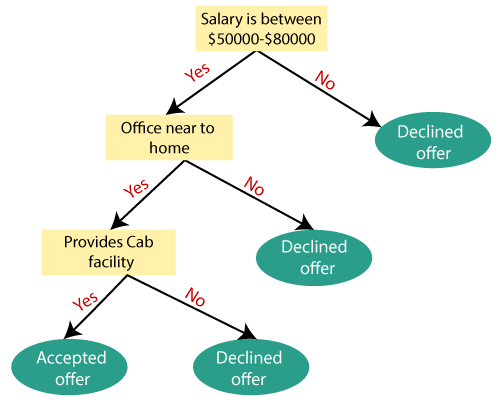

In [51]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

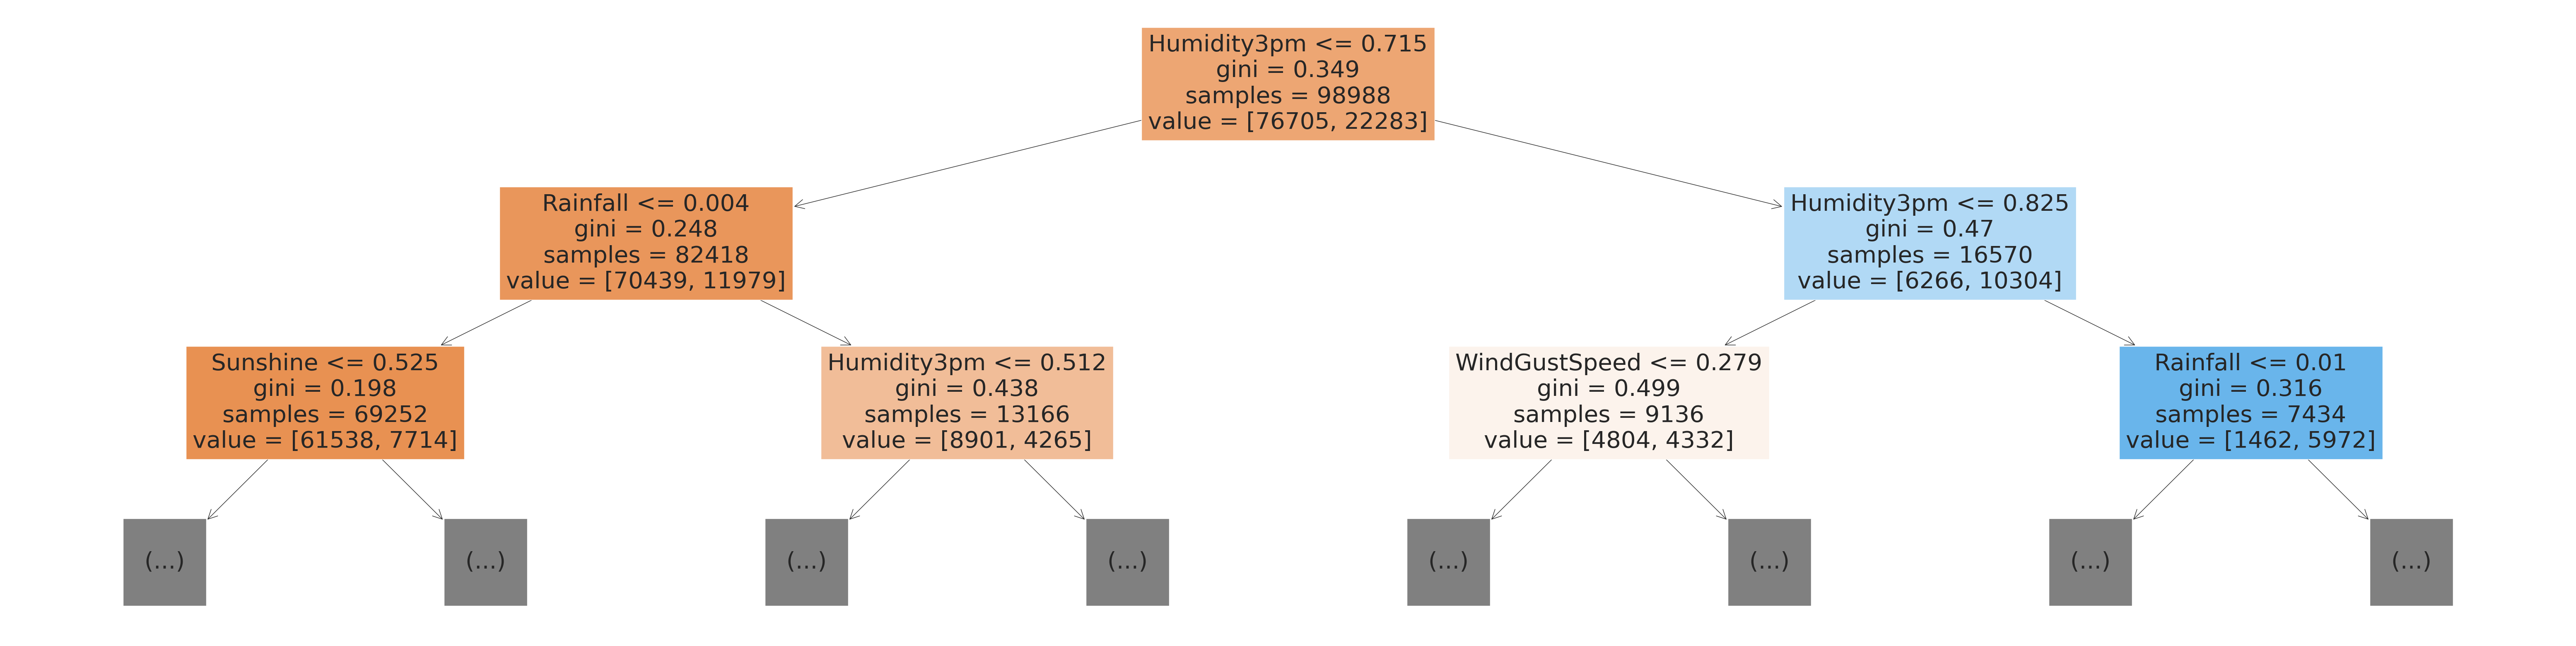

In [52]:
plt.figure(figsize=(80, 20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)
# plt.figure(figsize=(250, 100))
# plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True)

A high gini score means bad split, a lower gini score means good split.

**How a decision tree is created?**

Note the `gini` value in each box. This is the loss function used by decision tree to decide which column to be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0.

In [53]:
# max depth of tree

# model.tree_.max_depth # way 1
model.get_depth() # way 2

48

We can also display tree as text.

It analyses all the possible splits, columns and everything, and gives the best possible split and Gini score.

In [54]:
tree_text = export_text(model, max_depth=10,feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am <= 0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am >  0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

From this, we can guess the reason of why training accuracy was 100%, and validation accuracy is lower. It's because the model sees all the data from training dataset, and makes decisions accordingly, it learns the data, memorizes the data and makes a tree accordingly. This is called `overfitting`.

And, when any new data is inserted, it tries to fit that data in this decision tree, and since it couldn't fit anywhere, the accuracy is lower.

### **Feature Importance**

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by decision tree.

In [55]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_Unknown', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday_No', 'RainToday_Unknown', 'RainToday_Yes'],
      dtype='object', length=119)

In [56]:
model.feature_importances_

array([3.43949832e-02, 3.20723744e-02, 5.96978427e-02, 2.39997157e-02,
       4.96970278e-02, 5.52776844e-02, 2.77290154e-02, 2.87896517e-02,
       3.97762378e-02, 2.61665505e-01, 3.38797443e-02, 6.29086081e-02,
       1.41634157e-02, 1.82574107e-02, 3.39304134e-02, 2.99978180e-02,
       2.29983521e-03, 1.97127428e-03, 1.30448300e-03, 7.05458133e-04,
       1.51355792e-03, 1.12862805e-03, 8.66864394e-04, 1.77451768e-03,
       1.21677026e-03, 1.57331930e-03, 8.42954495e-04, 2.05031388e-03,
       1.90637772e-03, 3.26731137e-04, 1.11629763e-03, 1.52431517e-03,
       5.08479231e-04, 8.30004101e-04, 1.48248394e-03, 8.87667861e-04,
       7.61612213e-04, 7.02994607e-04, 1.72668316e-03, 2.07806756e-03,
       3.80229195e-04, 7.64016199e-04, 1.38715756e-03, 1.47491895e-03,
       1.48825382e-03, 8.67028594e-04, 8.33784178e-04, 1.54580309e-03,
       1.09367536e-03, 2.03218887e-03, 8.51581460e-04, 1.79979059e-03,
       9.69639078e-04, 1.28254100e-03, 1.28721925e-03, 3.77018000e-04,
      

In [57]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

# importance_df.sort_values(by='importance', ascending=False)

In [58]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.261666
11    Pressure3pm    0.062909
2        Rainfall    0.059698
5   WindGustSpeed    0.055278
4        Sunshine    0.049697
8     Humidity9am    0.039776
0         MinTemp    0.034395
14        Temp9am    0.033930
10    Pressure9am    0.033880
1         MaxTemp    0.032072

The columns that are shown above, according to the decreasing order of importance, we can see that the columns are the same as those in the decision tree diagram.

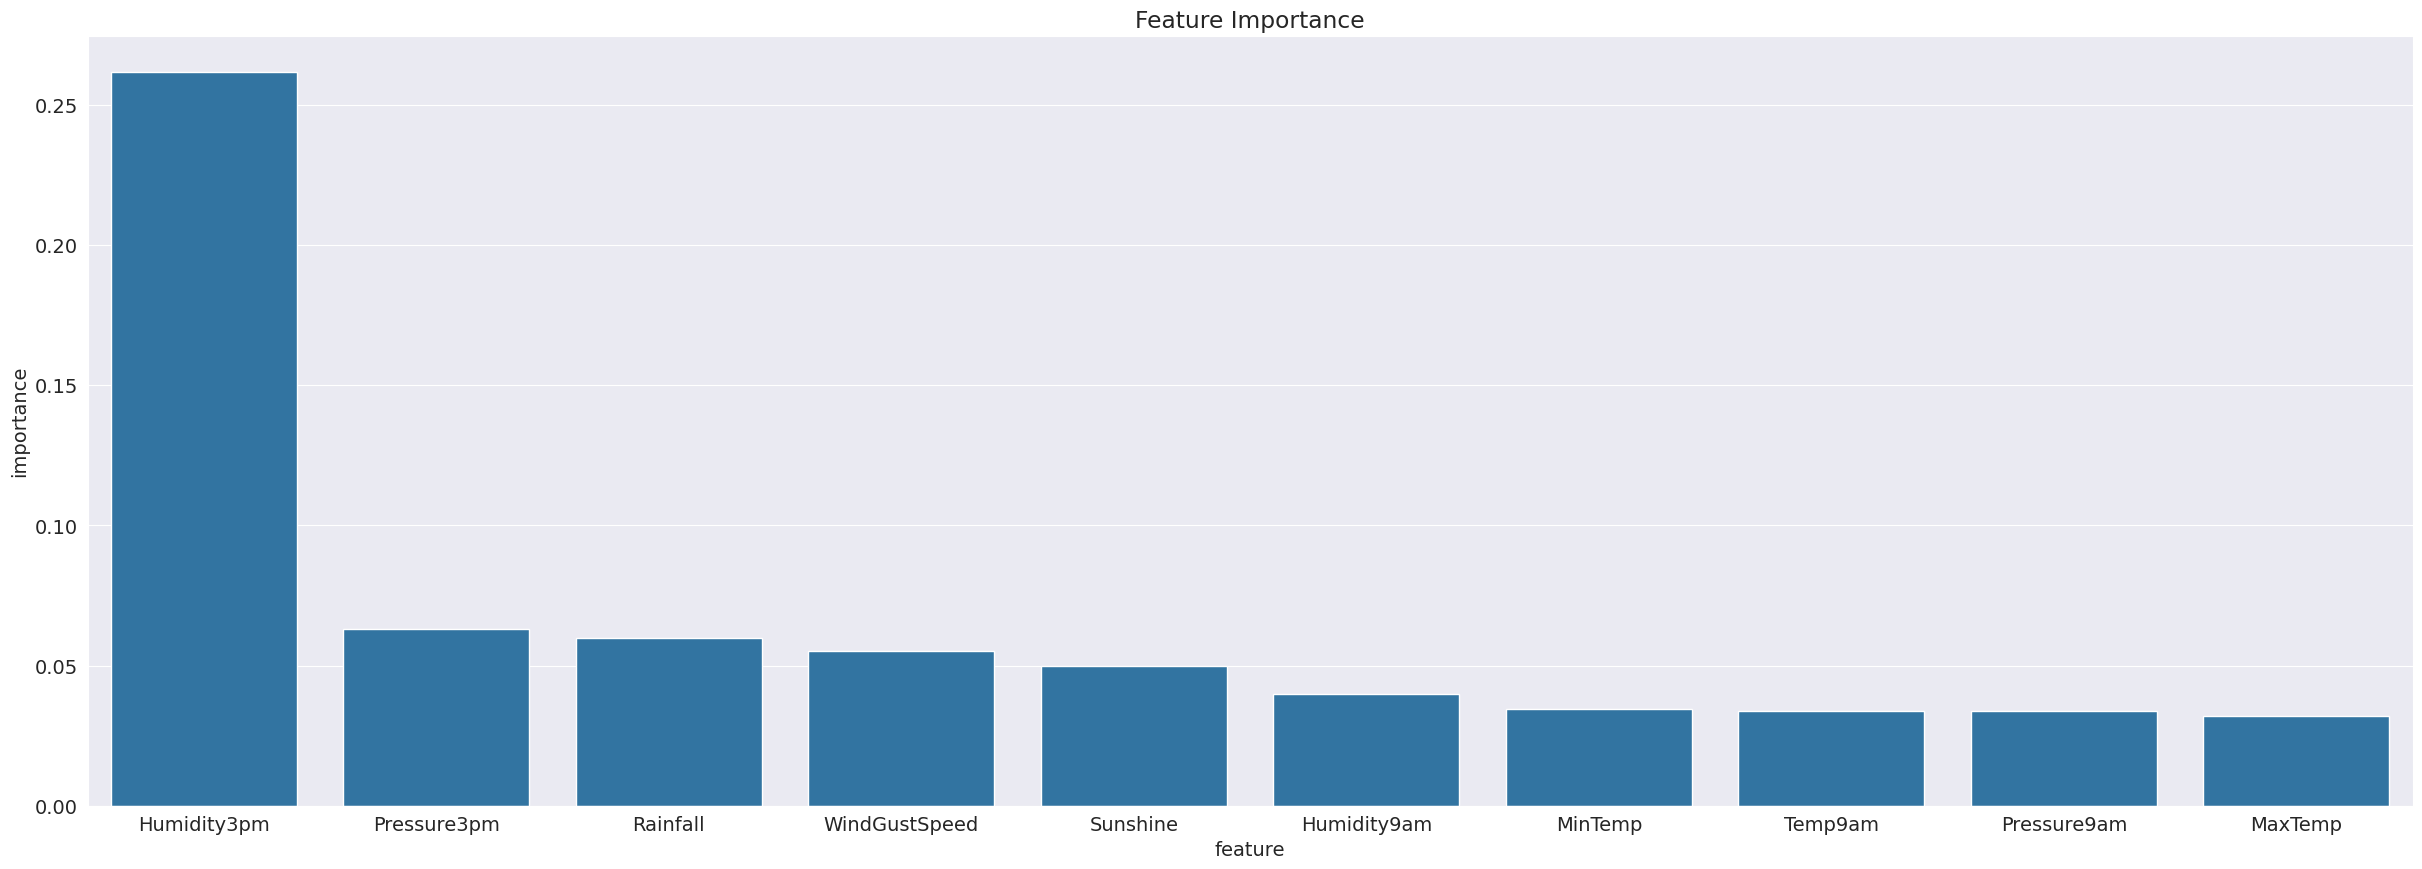

In [59]:
plt.figure(figsize=(30, 10))
sns.barplot(data=importance_df.head(10), x="feature", y="importance")
plt.title("Feature Importance")
plt.show()

## **Hyperparameter tuning and Overfitting**

Overfitting: gives 100% accuracy on training data, while the accuracy on validation dataset is marginally better than any dumb baseline model.

The process of reducing overfitting is called *regularization*.

These arguements are called hyperparameters because they must be configured manually (as opposed to model whithin the model which are learned from data).
We'll explore couple of parameters:

1. `max_depth`
2. `max_leaf_nodes`

**max_depth**

by reducing the max depth of decision tree, we can prevent tree from memorizing all the training examples, which may lead to better generalization.

In [60]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [61]:
model.score(X_train, train_targets)

0.8291308037337859

In [62]:
model.score(X_val, val_targets)

0.8334397307178921

Here, we can see that the accuracy on the training data is ~82%, and that on validaton set is ~83%, which is much better. The accuracy on max_depth=3 is lower than training the model on whole dataset, is becuase the model is just learning on 3 depths, and not the whole dataset (not memorizing the dataset), and tus, it resulted in higher accuracy on the validation dataset.

In [63]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]\nclass = No'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]\ncla

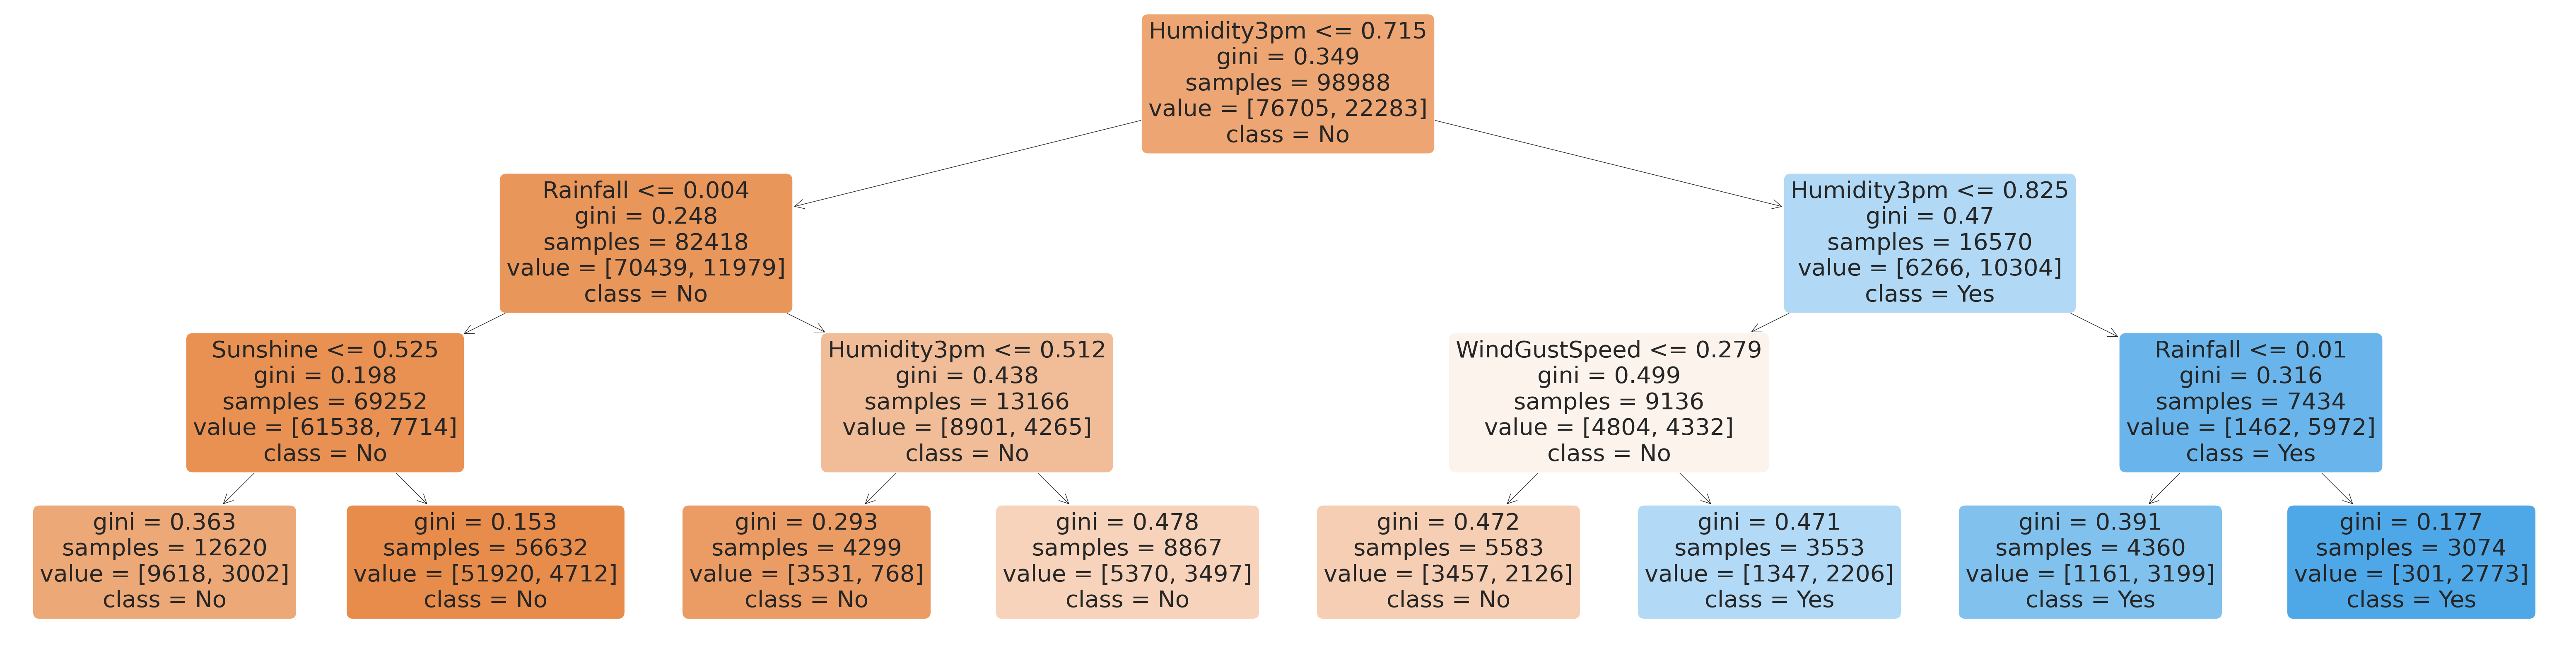

In [64]:
plt.figure(figsize=(80, 20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_) # in the value =[,] -> left = "No", right="Yes"

In [65]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



How to determine what's the perfect `max_depth` to train the model, and get a good Gini score?

In [66]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth=md, random_state=42)
  model.fit(X_train, train_targets)
  train_error = 1-model.score(X_train, train_targets)
  val_error = 1-model.score(X_val, val_targets)
  return {'Max Depth: ':md, 'Training error: ':train_error, 'Validation error: ':val_error}

In [67]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

CPU times: user 51.9 s, sys: 1.88 s, total: 53.8 s
Wall time: 54.3 s


In [68]:
errors_df

Max Depth:   Training error:   Validation error: 
0             1          0.184315            0.177935
1             2          0.179547            0.172712
2             3          0.170869            0.166560
3             4          0.165707            0.164355
4             5          0.160676            0.159074
5             6          0.156271            0.157275
6             7          0.153312            0.154605
7             8          0.147806            0.157739
8             9          0.140916            0.156578
9            10          0.132966            0.157565
10           11          0.123247            0.159248
11           12          0.113448            0.161221
12           13          0.101861            0.165400
13           14          0.090021            0.166270
14           15          0.078969            0.172538
15           16          0.068291            0.175207
16           17          0.058381            0.176716
17           18          0.048713            0.181591
18           19          0.039914            0.186524
19           20          0.032226            0.188091

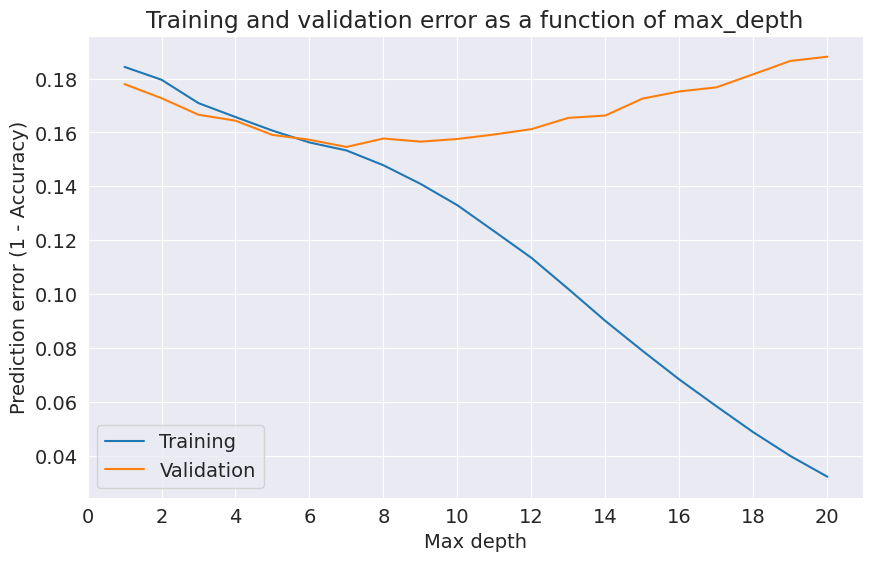

In [69]:
plt.figure()
plt.plot(errors_df['Max Depth: '], errors_df['Training error: '], label='Training error')
plt.plot(errors_df['Max Depth: '], errors_df['Validation error: '], label='Validation error')
plt.title("Training and validation error as a function of max_depth")
plt.xticks(range(0,21,2))
plt.xlabel("Max depth")
plt.ylabel("Prediction error (1 - Accuracy)")
plt.legend(['Training', 'Validation'])

This is a common pattern you'll see with all machine learning algorithms:

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Here, we can see that at max_depth = 7, it gives us the best possible optimal fit. It gives us the lowest validation error.

In [70]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8466884874934335, 0.8453949277465034)

**max_leaf_nodes**

Another way to control the size of complexity of decision tree is to limit the number of leaf nodes. This allows branches of tree to have varying depths.

Decision Tree doesn't go layer by layer, but it checks all the leaf nodes,a nd check the best pssible Gini Score for all leaf nodes.

In [71]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [72]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [73]:
model.score(X_train, train_targets)

0.8480421869317493

In [74]:
model.score(X_val, val_targets)

0.8442342290058615

In [75]:
model.tree_.max_depth

12

Certain paths in the tree went down to 12 layers, and in some paths, it covered short distances/layers. Thus, the max possible depth it could go was 12.

In [76]:
print(export_text(model, feature_names=list(X_train.columns)[:3000]))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

## **Training a Random Forest**

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine results of several decision trees trained with slightly different parameters. This is called `random forest model`.  

The key idea here is that, each decision tree in forest will make different kinds of errors, and upon averaging, many of the errors will cancel out.

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
%%time
model = RandomForestClassifier(n_jobs=-1, random_state=42)

CPU times: user 61 µs, sys: 5 µs, total: 66 µs
Wall time: 69.6 µs


`n_jobs` allows the random forest to use multiple parallel workers to train decision trees, and `random_state=42` ensures that we get same result for each execution.

In [79]:
%%time
model.fit(X_train, train_targets)

CPU times: user 46.6 s, sys: 438 ms, total: 47.1 s
Wall time: 30.1 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [80]:
model.score(X_train, train_targets)

0.9999595910615429

In [81]:
model.score(X_val, val_targets)

0.8559572862863444

Once again, the training accuracy was 100%, but the validation accuracy is 85.6%, which is much better. Even better than training the model with single decision tree.  

We can also look at the probablities of the prediction.

In [82]:
train_prob = model.predict_proba(X_train)
train_prob

array([[0.9 , 0.1 ],
       [0.97, 0.03],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.95, 0.05]])

We can access individual decision tree using `model.estimators_`

In [83]:
len(model.estimators_)

100

In [84]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

[Text(0.5, 0.875, 'RainToday_Yes <= 0.5\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]\nclass = No'),
 Text(0.25, 0.625, 'Cloud9am <= 0.611\ngini = 0.262\nsamples = 48769\nvalue = [65102, 11926]\nclass = No'),
 Text(0.125, 0.375, 'WindDir9am_E <= 0.5\ngini = 0.212\nsamples = 36906\nvalue = [51301, 7031]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindDir9am_N <= 0.5\ngini = 0.387\nsamples = 11863\nvalue = [13801, 4895]\nclass = No'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Pressure3pm <= 0.556\ngini = 0.497\nsamples = 13838\nvalue = [11785, 10175]\nclass = No'),
 Text(0.625, 0.375, 'Humidity9am <= 0.825\ngini = 0.482\nsamples = 5022\nvalue = [3250, 4755]\nclass = Yes'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Location_WaggaWagga <= 0.5\ngini = 0.475\nsamples = 8816\nvalue = [8535, 5420]\nclass 

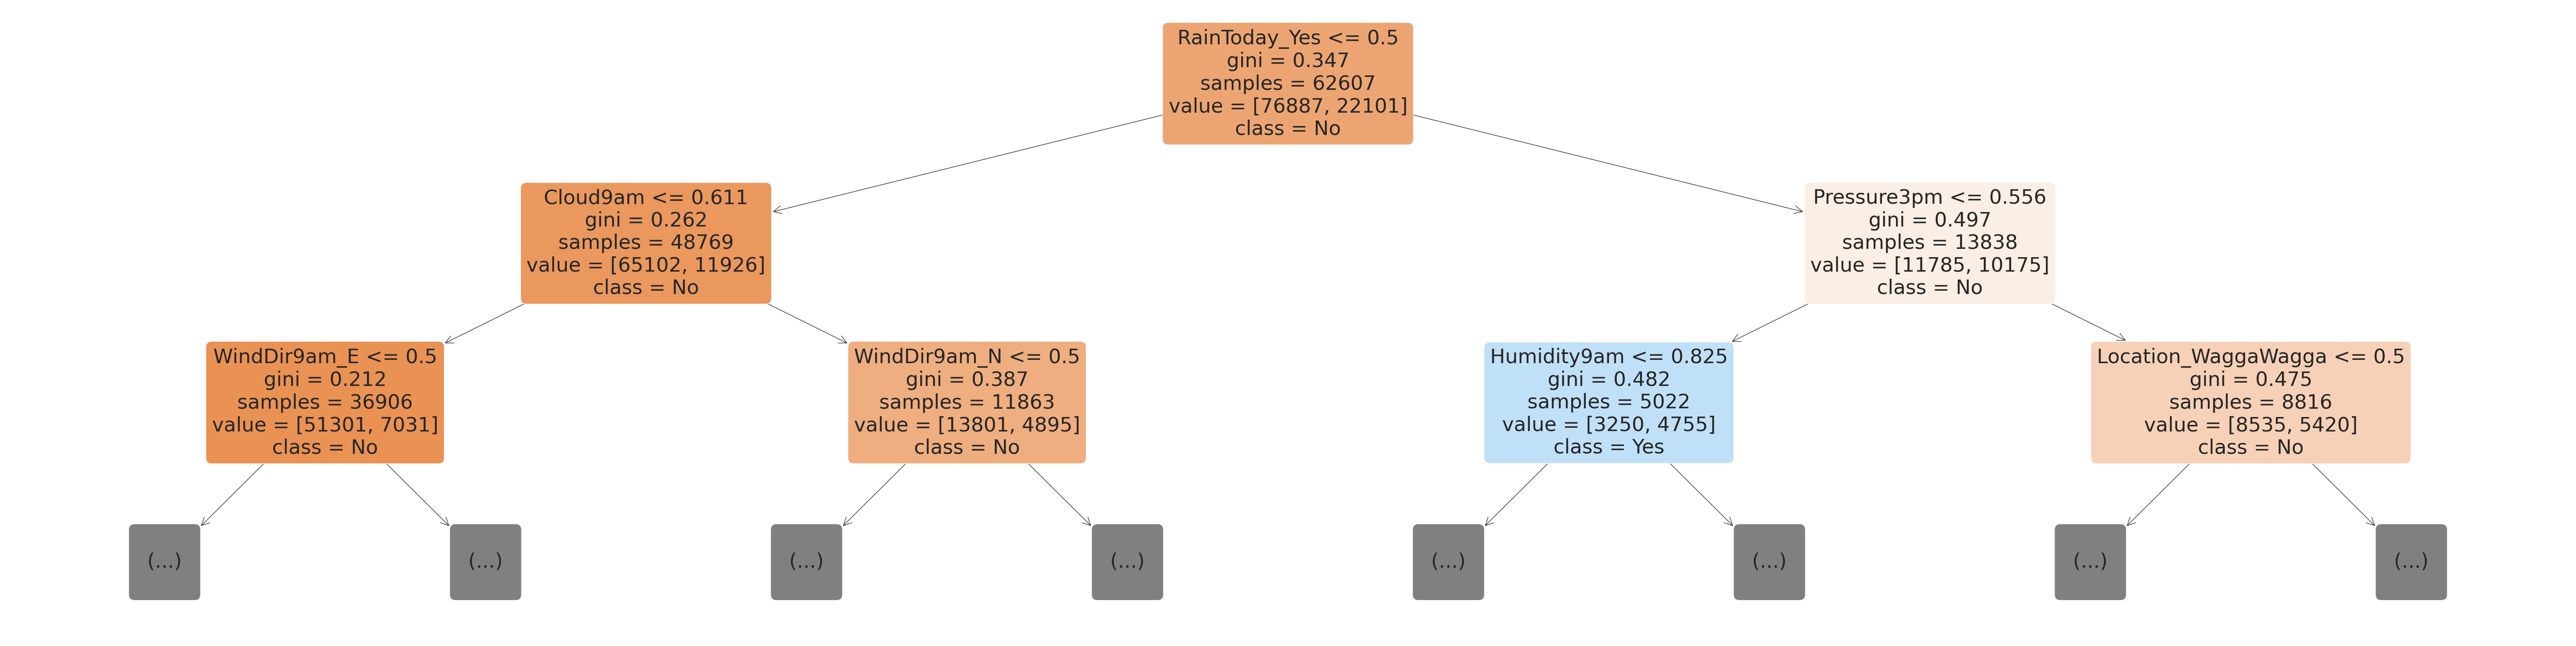

In [85]:
plt.figure(figsize=(80, 20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

[Text(0.5, 0.875, 'Sunshine <= 0.417\ngini = 0.349\nsamples = 62448\nvalue = [76707, 22281]\nclass = No'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.745\ngini = 0.499\nsamples = 11821\nvalue = [9860, 8914]\nclass = No'),
 Text(0.125, 0.375, 'Humidity3pm <= 0.625\ngini = 0.45\nsamples = 7988\nvalue = [8315, 4320]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Temp3pm <= 0.583\ngini = 0.377\nsamples = 3833\nvalue = [1545, 4594]\nclass = Yes'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'RainToday_Unknown <= 0.5\ngini = 0.278\nsamples = 50627\nvalue = [66847, 13367]\nclass = No'),
 Text(0.625, 0.375, 'RainToday_Yes <= 0.5\ngini = 0.273\nsamples = 50091\nvalue = [66382, 12954]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Temp3pm <= 0.558\ngini = 0.498\nsamples = 536\nvalue = [465, 413]\nclass = No'),
 Text(0

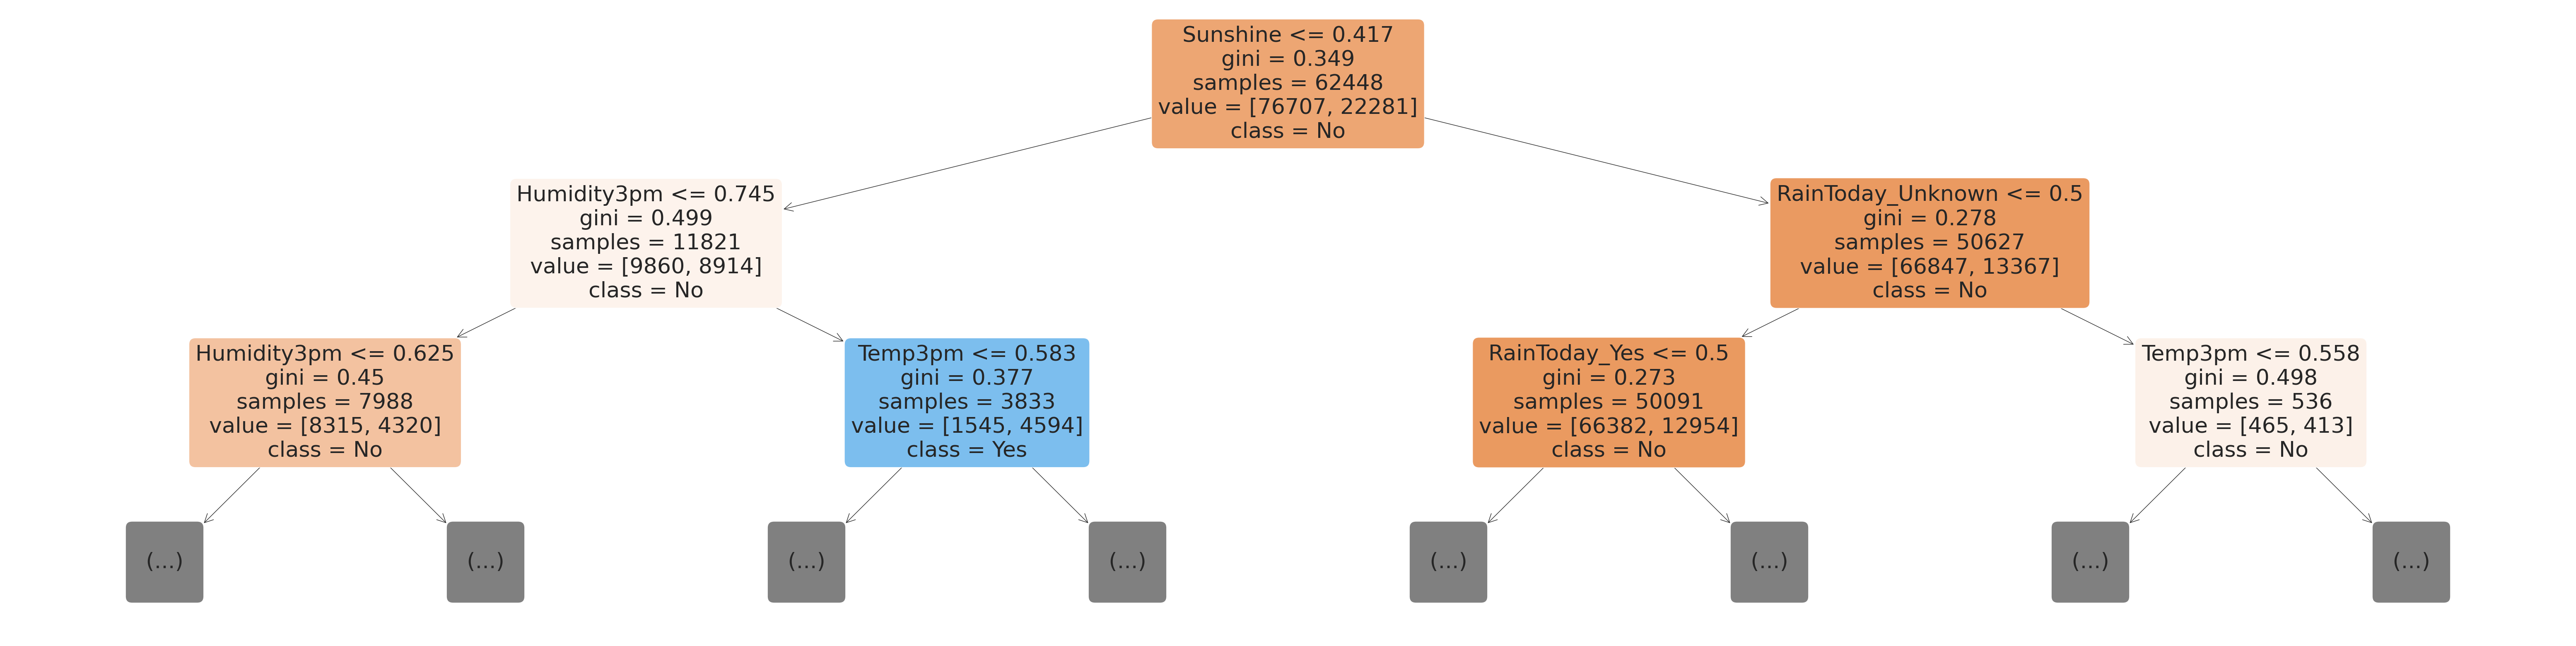

In [86]:
plt.figure(figsize=(80, 20))
plot_tree(model.estimators_[15], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

In [87]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

In [88]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.133176
4        Sunshine    0.055553
11    Pressure3pm    0.052976
2        Rainfall    0.050488
10    Pressure9am    0.049379
8     Humidity9am    0.049261
5   WindGustSpeed    0.046640
15        Temp3pm    0.045179
1         MaxTemp    0.042172
0         MinTemp    0.041549

<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

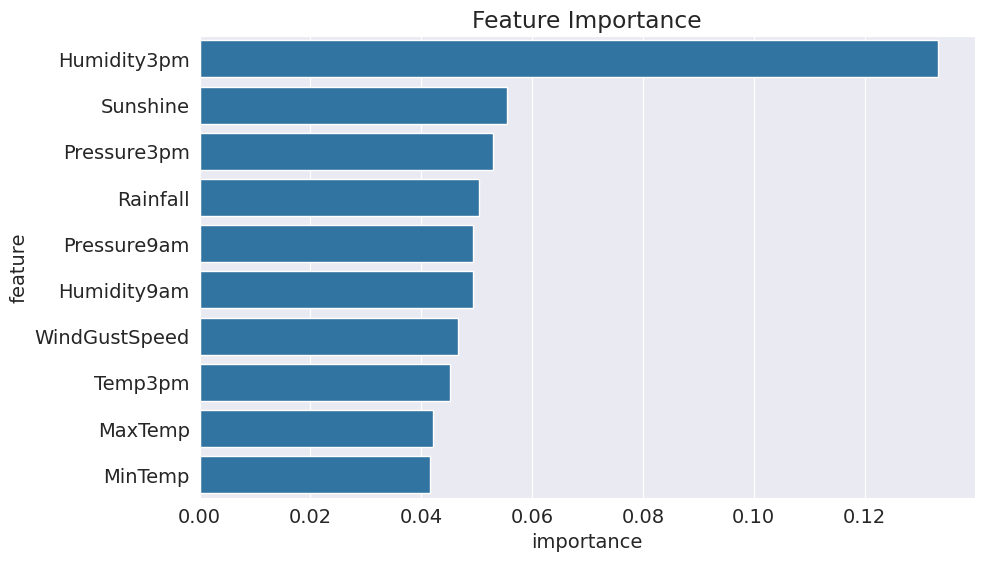

In [89]:
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(10), x="importance", y="feature")

**Hyperparameter tuning with Random Forest**

In [90]:
base_model = RandomForestClassifier(n_jobs=-1, random_state=42).fit(X_train, train_targets)

In [91]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [92]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999595910615429, 0.8559572862863444)

**n_estimators**

This arguement controls the number of decision trees in random forest. The default value is 100. For larger dataset, it's beneficial to have more estimators.

**10 estimators**

In [93]:
model = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42).fit(X_train, train_targets)

In [94]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9873520022629005, 0.8441761940688295)

In [95]:
base_accs

(0.9999595910615429, 0.8559572862863444)

**500 estimators**

In [96]:
model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42).fit(X_train, train_targets)

In [97]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9999797955307714, 0.8572920898380825)

As we can see, that there's not much bigger or significant change in the accuracy score, even after using 5x the number of default number of estimators.

`max_depth` and `max_leaf_nodes`

These arguements are passed directly to each decision tree, and control max depth and max no. of leaf nodes of each tree respectively. By default, no max depth is specified, which is why each tree has training accuracy of 100%.

In [98]:
def test_params(**params):
  model = RandomForestClassifier(n_jobs=-1, random_state=42, **params).fit(X_train, train_targets)
  return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [99]:
test_params(max_depth=5)

(0.821847092576878, 0.8262433985259126)

In [100]:
test_params(max_depth=26)

(0.9820685335596234, 0.857001915152922)

In [101]:
test_params(max_leaf_nodes=2**5)

(0.8307572635066877, 0.8324531367883465)

In [102]:
test_params(max_leaf_nodes = 2**20)

(0.9999595910615429, 0.8567697754047937)

In [103]:
base_accs # no max_depth or max_leaf_nodes

(0.9999595910615429, 0.8559572862863444)

`max_features`

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.

<img src="https://i.imgur.com/FXGWMDY.png" width="720">

Notice that the default value `auto` causes only $\sqrt{n}$ out of total features ( $n$ ) to be chosen randomly at each split. This is the reason each decision tree in the forest is different. While it may seem counterintuitive, choosing all features for every split of every tree will lead to identical trees, so the random forest will not generalize well.

In [104]:
test_params(max_features='log2')

(0.9999595910615429, 0.8540421333642852)

In [105]:
test_params(max_features=3)

(0.9999595910615429, 0.8528814346236434)

In [106]:
test_params(max_features=6)

(0.9999595910615429, 0.8540421333642852)

In [107]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [108]:
test_params(max_features=20)

(0.9999494888269285, 0.8575242295862109)

`min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [109]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9626419363963309, 0.8556671116011839)

In [110]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8501131450276801, 0.8455109976205676)

`min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.

In [111]:
test_params(min_impurity_decrease=1e-7)

(0.9996363195538853, 0.8558992513493123)

In [112]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [113]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [114]:
test_params(min_impurity_decrease=1e-6)

(0.9883420212551016, 0.8568858452788579)

`bootstrap`, `max_samples`

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


<img src="https://i.imgur.com/W8UGaEA.png" width="640">

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [115]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8558992513493123)

In [116]:
base_accs

(0.9999595910615429, 0.8559572862863444)

When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using `max_samples`. This can further generalize the model.

<img src="https://i.imgur.com/rsdrL1W.png" width="640">

In [117]:
test_params(max_samples=0.9)

(0.9997575463692568, 0.8565956705936975)

In [118]:
base_accs

(0.9999595910615429, 0.8559572862863444)

`class_weight`

In [119]:
train_targets.value_counts()/len(train_targets)

RainTomorrow
No     0.774892
Yes    0.225108
Name: count, dtype: float64

In [120]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [121]:
test_params(class_weight='balanced')

(0.9999494888269285, 0.8556671116011839)

In [122]:
test_params(class_weight={'No':1, 'Yes':2})

(0.9999292843576999, 0.8565376356566653)

## **Puting it all togeather**

Let's train a random forest with customized hyperparameters.

In [123]:
model = RandomForestClassifier(
      n_estimators=500,
      n_jobs=-1,
      random_state=42,
      max_depth=30,
      max_features=7,
      class_weight={"No":1, "Yes":1.5}
    )

In [124]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [125]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9920293368893199, 0.8561894260344728)

In [126]:
base_accs

(0.9999595910615429, 0.8559572862863444)

We've increased the accuracy from 84.59% with a single decision tree to 85.61% with a well-tuned random forest. Depending on the dataset and the kind of problem, you may or may not a see a significant improvement with hyperparameter tuning.

This could be due to any of the following reasons:

- We may not have found the right mix of hyperparameters to regularize (reduce overfitting) the model properly, and we should keep trying to improve the model.

- We may have reached the limits of the modeling technique we're currently using (Random Forests), and we should try another modeling technique e.g. gradient boosting.

- We may have reached the limits of what we can predict using the given amount of data, and we may need more data to improve the model.

- We may have reached the limits of how well we can predict whether it will rain tomorrow using the given weather measurements, and we may need more features (columns) to further improve the model. In many cases, we can also generate new features using existing features (this is called feature engineering).

- Whether it will rain tomorrow may be an inherently random or chaotic phenomenon which simply cannot be predicted beyond a certain accuracy any amount of data for any number of weather measurements with any modeling technique.  

Remember that ultimately all models are wrong, but some are useful. If you can rely on the model we've created today to make a travel decision for tomorrow, then the model is useful, even though it may sometimes be wrong.

In [127]:
model.score(X_test, test_targets)

0.8453838453838454

## Predictions on new Input

In [128]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numerical_cols] = imputer.transform(input_df[numerical_cols])
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numerical_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [129]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [130]:
predict_input(model, new_input)

('Yes', 0.7963843244221757)

## **Saving and Loading Trained Models**


We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk.



In [131]:
import joblib

In [132]:
aussie_rain_rf = {
    'model':model,
    'scaler':scaler,
    'imputer':imputer,
    'encoder':encoder,
    'numerical_cols':numerical_cols,
    'categorical_cols':categorical_cols,
    'encoded_cols':encoded_cols,
    'input_cols':input_cols,
    'target_cols':target_col
}

In [133]:
joblib.dump(aussie_rain_rf, 'aussie_rain_rf.joblib')

['aussie_rain_rf.joblib']

In [134]:
aussie_rain2 = joblib.load('aussie_rain_rf.joblib')

In [135]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8453838453838454